In [16]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [3]:
# Define dataset directory
DATASET_DIR = r"D:\bio_s"
PAIN_LEVELS = ["baseline", "low_pain", "med_pain"]
EMG_COLUMNS = [0, 1]  # EMG columns: 0 = corrugator supercilii, 1 = zygomaticus major


In [14]:

subjects_dict = {}

for level in PAIN_LEVELS:
    level_path = os.path.join(DATASET_DIR, level)
    if not os.path.exists(level_path):
        print(f"Warning: {level_path} does not exist.")
        continue

    subjects = sorted([d for d in os.listdir(level_path) if os.path.isdir(os.path.join(level_path, d))])
    subjects_dict[level] = {}

    print(f"\nPain level: {level} | Subjects found: {len(subjects)}")
    for subj in subjects:
        subj_path = os.path.join(level_path, subj)
        mat_files = sorted([f for f in os.listdir(subj_path) if f.endswith('.mat')])
        subjects_dict[level][subj] = mat_files
        print(f"  {subj}: {len(mat_files)} segments")


Pain level: baseline | Subjects found: 26
  S008: 1 segments
  S009: 1 segments
  S012: 1 segments
  S019: 1 segments
  S026: 1 segments
  S034: 1 segments
  S036: 1 segments
  S045: 1 segments
  S049: 1 segments
  S051: 1 segments
  S052: 1 segments
  S057: 1 segments
  S068: 1 segments
  S069: 1 segments
  S070: 1 segments
  S072: 1 segments
  S076: 1 segments
  S082: 1 segments
  S087: 1 segments
  S095: 1 segments
  S107: 1 segments
  S110: 1 segments
  S114: 1 segments
  S126: 1 segments
  S129: 1 segments
  S134: 1 segments

Pain level: low_pain | Subjects found: 26
  S008: 60 segments
  S009: 59 segments
  S012: 60 segments
  S019: 60 segments
  S026: 60 segments
  S034: 60 segments
  S036: 60 segments
  S045: 60 segments
  S049: 60 segments
  S051: 60 segments
  S052: 60 segments
  S057: 60 segments
  S068: 59 segments
  S069: 60 segments
  S070: 60 segments
  S072: 60 segments
  S076: 60 segments
  S082: 60 segments
  S087: 60 segments
  S095: 60 segments
  S107: 60 segments


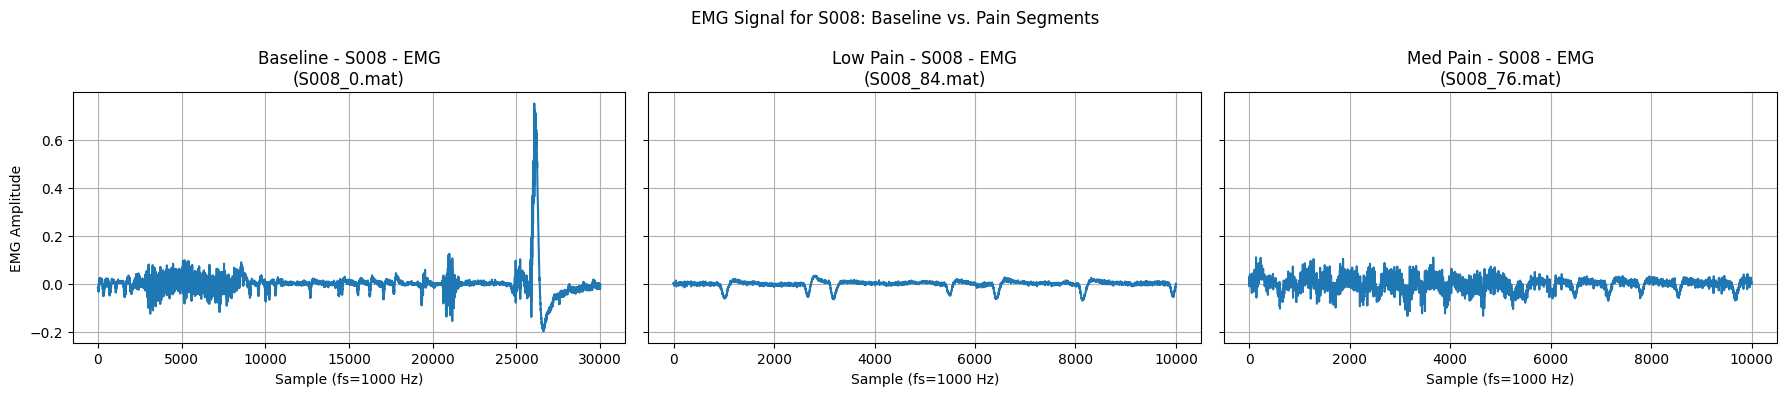

In [17]:

subject = 'S008'
segment_index = 50  # which segment to plot for low_pain/med_pain (0-based)

pain_levels = ['baseline', 'low_pain', 'med_pain']
titles = ['Baseline', 'Low Pain', 'Med Pain']

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
emg_found = False

for i, level in enumerate(pain_levels):
    seg_files = subjects_dict[level].get(subject, [])
    seg_files_sorted = sorted(seg_files)

    # For baseline, always use the only file
    if level == 'baseline':
        if len(seg_files_sorted) == 0:
            axs[i].set_title(f"{titles[i]}: No file")
            axs[i].axis('off')
            continue
        seg_file = seg_files_sorted[0]
    else:
        if len(seg_files_sorted) <= segment_index:
            axs[i].set_title(f"{titles[i]}: <{segment_index+1} files")
            axs[i].axis('off')
            continue
        seg_file = seg_files_sorted[segment_index]

    mat_path = os.path.join(DATASET_DIR, level, subject, seg_file)
    mat_data = scipy.io.loadmat(mat_path)
    data = mat_data['data']
    labels = mat_data['labels']
    fs = float(mat_data['fs'].squeeze())

    if labels.dtype.type is np.bytes_:
        labels = [l.decode('utf-8') for l in labels]
    else:
        labels = [str(l) for l in labels]

    emg_indices = [j for j, lab in enumerate(labels) if 'emg' in lab.lower()]
    if not emg_indices:
        axs[i].set_title(f"{titles[i]}: EMG not found")
        axs[i].axis('off')
        continue

    emg_found = True
    emg_idx = emg_indices[0]
    axs[i].plot(data[:, emg_idx])
    axs[i].set_title(f"{titles[i]} - {subject} - EMG\n({seg_file})")
    axs[i].set_xlabel(f"Sample (fs={fs:.0f} Hz)")
    axs[i].grid(True)

if emg_found:
    axs[0].set_ylabel("EMG Amplitude")
plt.suptitle(f"EMG Signal for {subject}: Baseline vs. Pain Segments")
plt.tight_layout()
plt.show()